In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
def return_euler(_planex, _planey):
    # Avoid divide by zero issues
    if(_planex == 0):
        _planex = 10**-6
    if(_planey == 0):
        _planey = 10**-6
    
    # One of the solutions provided by wolfram alpha solver
    # format for input was:
    
    # cos(phi1)*sin(Phi) - x = 0
    # sin(phi1)*sin(Phi) - y = 0
    # Solve for phi1/Phi

    _sq = (_planex**2) + (_planey**2)
    _p1 = 2 * np.arctan((_sq + _planex) / _planey)
    _P = -1.0 * np.arcsin(_sq)

    # Convert to degrees
    _p1d = np.degrees(_p1)
    _Pd = np.degrees(_P)
    if(_p1d < 0):
        _p1d = _p1d
    
    if(_Pd < 0):
        _Pd = -_Pd
    # If negative rotation is given subtract by 180.
    # If less than -180, flip sign.
    return _p1d, _Pd

In [20]:
xvecs = pd.read_csv('/home/tka/source/data/hires/hires-testsample-xvecs.csv')
yvecs = pd.read_csv('/home/tka/source/data/hires/hires-testsample-yvecs.csv')
rots = pd.read_csv('/home/tka/source/data/hires/hires-testsample-rotations.csv')
dcmask = pd.read_csv('/home/tka/source/data/hires/dc_mask.csv')

In [21]:
xvecs

,0.0,0.0.1,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,0.0.7,0.0.8,0.0.9,...,0.0.3591,0.0.3592,0.0.3593,0.0.3594,0.0.3595,0.0.3596,0.0.3597,0.0.3598,0.0.3599,0.0.3600
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
rots.shape

(180, 3601)

In [23]:
dcmask.shape

(179, 3601)

In [24]:
rots

,179.0,179.0.1,179.0.2,179.0.3,179.0.4,179.0.5,179.0.6,179.0.7,179.0.8,179.0.9,...,179.0.3591,179.0.3592,179.0.3593,179.0.3594,179.0.3595,179.0.3596,179.0.3597,179.0.3598,179.0.3599,179.0.3600
0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,...,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0
1,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,...,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0
2,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,...,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0
3,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,...,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0
4,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,...,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,...,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0
176,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,...,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0
177,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,...,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0,179.0
178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
rots.shape

(180, 3601)

In [33]:
rots_m = np.ndarray(shape=rots.shape)
euler_m_unnorm = np.zeros(shape=(rots.shape[0], rots.shape[1], 3))
for row in range(0, rots.shape[0]):
    for col in range(0, rots.shape[1]):
        if(xvecs.iloc[row,col] == 0) and (yvecs.iloc[row,col] == 0):
            rots_m[row,col] = 0.0
        else:
            rots_m[row,col] = rots.iloc[row,col]
        
        phi1, Phi = return_euler(xvecs.iloc[row, col], yvecs.iloc[row, col])
        euler_m_unnorm[row,col,0] = phi1
        euler_m_unnorm[row,col,1] = Phi
        euler_m_unnorm[row,col,2] = rots_m[row,col]

In [34]:
eulerm_norm = np.ndarray(shape=euler_m_unnorm.shape)

In [47]:
eulerm_norm[1:,:,0] = (euler_m_unnorm[1:,:,0] / 180.0) * dcmask
eulerm_norm[1:,:,1] = (euler_m_unnorm[1:,:,1] / 90.0) * dcmask
eulerm_norm[1:,:,2] = (euler_m_unnorm[1:,:,2] / 180.0) * dcmask

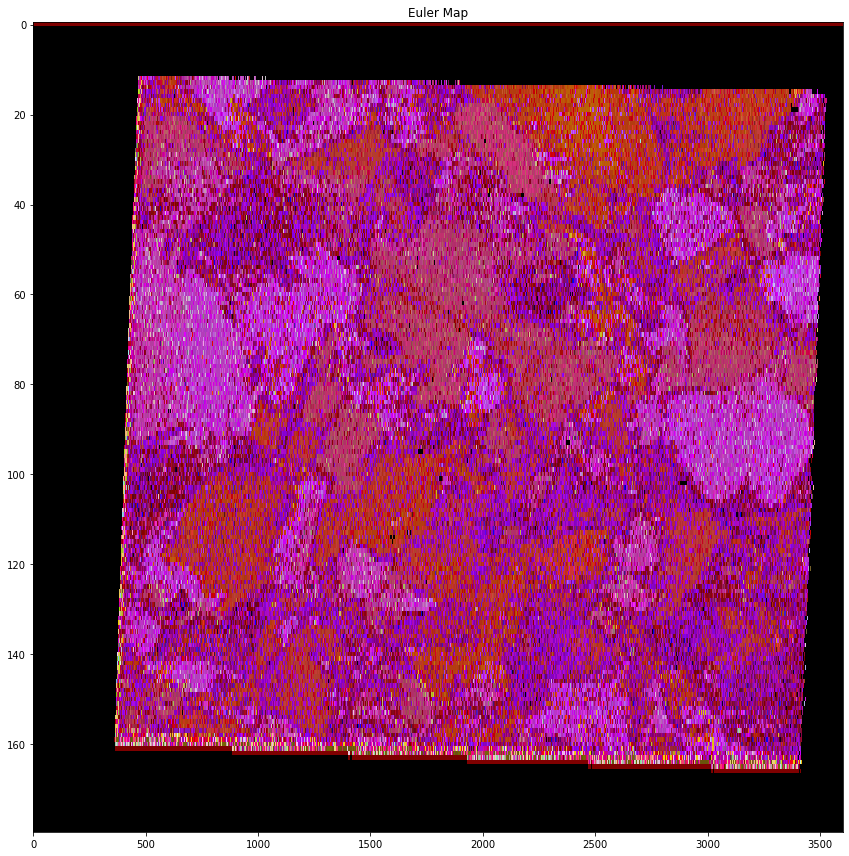

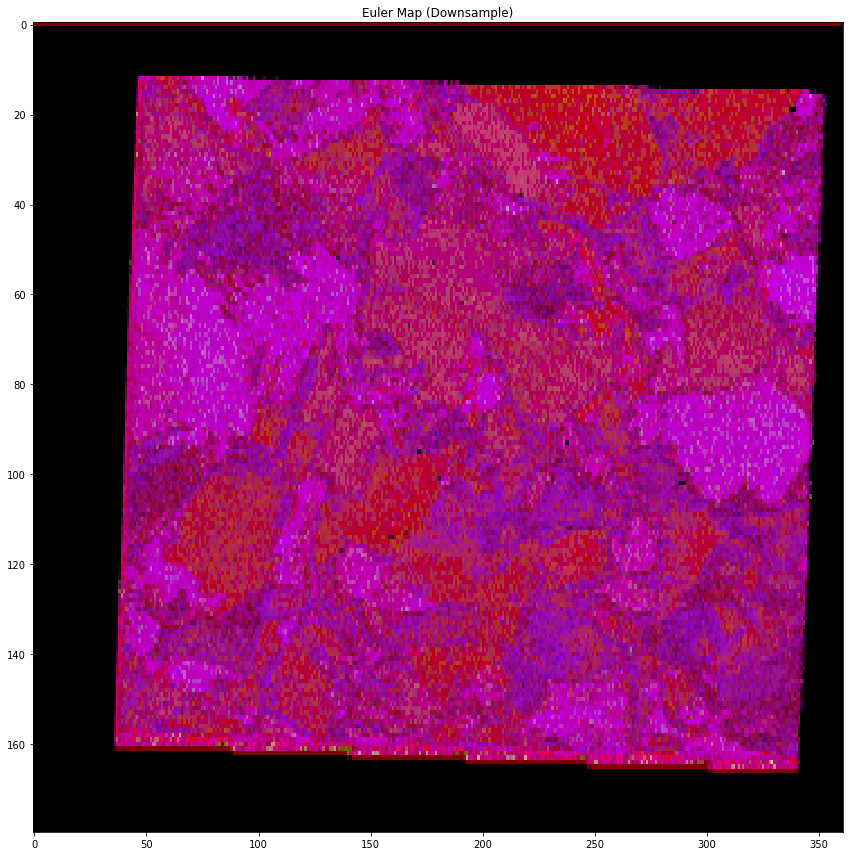

In [55]:
from skimage.measure import block_reduce
eulerm_ds = block_reduce(eulerm_norm, (1, 10, 1), func=np.mean)
plt.figure(figsize=[12, 12])
plt.title("Euler Map")
plt.imshow(eulerm_norm, aspect=eulerm_norm.shape[1]/eulerm_norm.shape[0])
plt.tight_layout()
plt.savefig('/home/tka/source/visu/eulerm-raw.png')
plt.figure(figsize=[12, 12])
plt.title("Euler Map (Downsample)")
plt.imshow(eulerm_ds, aspect=eulerm_ds.shape[1]/eulerm_ds.shape[0])
plt.tight_layout()
plt.savefig('/home/tka/source/visu/eulerm-ds10.png')

In [56]:
euler_m_unnorm

array([[[9.00001146e+01, 1.14591559e-10, 0.00000000e+00],
        [9.00001146e+01, 1.14591559e-10, 0.00000000e+00],
        [9.00001146e+01, 1.14591559e-10, 0.00000000e+00],
        ...,
        [9.00001146e+01, 1.14591559e-10, 0.00000000e+00],
        [9.00001146e+01, 1.14591559e-10, 0.00000000e+00],
        [9.00001146e+01, 1.14591559e-10, 0.00000000e+00]],

       [[9.00001146e+01, 1.14591559e-10, 0.00000000e+00],
        [9.00001146e+01, 1.14591559e-10, 0.00000000e+00],
        [9.00001146e+01, 1.14591559e-10, 0.00000000e+00],
        ...,
        [9.00001146e+01, 1.14591559e-10, 0.00000000e+00],
        [9.00001146e+01, 1.14591559e-10, 0.00000000e+00],
        [9.00001146e+01, 1.14591559e-10, 0.00000000e+00]],

       [[9.00001146e+01, 1.14591559e-10, 0.00000000e+00],
        [9.00001146e+01, 1.14591559e-10, 0.00000000e+00],
        [9.00001146e+01, 1.14591559e-10, 0.00000000e+00],
        ...,
        [9.00001146e+01, 1.14591559e-10, 0.00000000e+00],
        [9.00001146e+01, 1.14